In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import pandas as pd 
import numpy as np 
import cv2 
import os 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
train_dir = '../input/standard-ocr-dataset/data/training_data'
classes = os.listdir(train_dir)
classes

['N',
 '7',
 'R',
 '2',
 'B',
 'I',
 'F',
 'H',
 '5',
 'E',
 'U',
 'M',
 '8',
 'X',
 '0',
 'K',
 'Q',
 'Y',
 'S',
 'G',
 'A',
 'O',
 'T',
 'V',
 'Z',
 '3',
 '1',
 'C',
 '4',
 'P',
 '9',
 'L',
 '6',
 'W',
 'D',
 'J']

In [3]:
test_dir = '../input/standard-ocr-dataset/data/testing_data'
test_classes = os.listdir(test_dir)

In [4]:
X  = []
y = []

for class_name in classes : 
    class_samples = os.listdir(f'{train_dir}/{class_name}')
    for sample in class_samples:
        X.append(cv2.resize(cv2.cvtColor(cv2.imread(f'{train_dir}/{class_name}/{sample}'), cv2.COLOR_BGR2RGB), (28, 28)))
        y.append(class_name)
        
images = np.asarray(X)
images = images/255.0
labels = np.asarray(y)

print(images.shape , labels.shape)

(20628, 28, 28, 3) (20628,)


In [5]:
test_X  = []
test_y = []

for test_class_name in test_classes : 
    class_samples = os.listdir(f'{test_dir}/{test_class_name}')
    for sample in class_samples:
        test_X.append(cv2.resize(cv2.cvtColor(cv2.imread(f'{test_dir}/{test_class_name}/{sample}'), cv2.COLOR_BGR2RGB), (28, 28)))
        test_y.append(test_class_name)
        
test_images = np.asarray(test_X)
test_images = test_images/255.0
test_labels = np.asarray(test_y)

print(test_images.shape , test_labels.shape)

(1008, 28, 28, 3) (1008,)


In [6]:
class_counts = Counter(labels)
class_counts

Counter({'N': 573,
         '7': 573,
         'R': 573,
         '2': 573,
         'B': 573,
         'I': 573,
         'F': 573,
         'H': 573,
         '5': 573,
         'E': 573,
         'U': 573,
         'M': 573,
         '8': 573,
         'X': 573,
         '0': 573,
         'K': 573,
         'Q': 573,
         'Y': 573,
         'S': 573,
         'G': 573,
         'A': 573,
         'O': 573,
         'T': 573,
         'V': 573,
         'Z': 573,
         '3': 573,
         '1': 573,
         'C': 573,
         '4': 573,
         'P': 573,
         '9': 573,
         'L': 573,
         '6': 573,
         'W': 573,
         'D': 573,
         'J': 573})

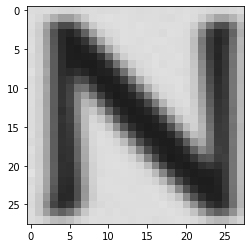

In [7]:
plt.imshow(images[0])

In [8]:
le = LabelEncoder().fit(y)
categorical_encode = le.transform(y)
categorical_encode[:10]

array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

In [12]:
length, x_len, y_len, ch = x_train.shape

X_train = x_train.reshape(length,x_len*y_len*ch)

In [13]:
##########################################################
#TRAIN SVM ALGORITHM
##########################################################

model_clf = svm.SVC(C=len(class_counts), kernel ='poly')

# Train the svm algorithm
model_clf.fit(X_train, y_train)

SVC(C=36, kernel='poly')

In [14]:
length_test, x_lentest, y_lentest, ch_test = x_test.shape
X_test = x_test.reshape(length_test,x_lentest*y_lentest*ch_test)
y_pred = model_clf.predict(X_test)

In [15]:
from sklearn.metrics import multilabel_confusion_matrix
from math import sqrt
##########################################################
# MULTI-CLASS CONFUSION MATRIX FOR EACH CLASS
##########################################################

# Actual and predicted classes
lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label A-Z
# lst_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]
lst_classes = classes

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)
# Temp store results
acc_arr = [];
precision_arr = [];

for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    
    acc_arr.append(accuracy);
    precision_arr.append(precision);

    
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy));
    print("Precision: {0}".format(precision));

Print Class: 0
TP=133, FP=5, TN=5010, FN=9
Accuracy: 0.997
Precision: 0.964
Print Class: 1
TP=127, FP=7, TN=5022, FN=1
Accuracy: 0.998
Precision: 0.948
Print Class: 2
TP=123, FP=3, TN=5020, FN=11
Accuracy: 0.997
Precision: 0.976
Print Class: 3
TP=138, FP=1, TN=5015, FN=3
Accuracy: 0.999
Precision: 0.993
Print Class: 4
TP=145, FP=1, TN=5003, FN=8
Accuracy: 0.998
Precision: 0.993
Print Class: 5
TP=133, FP=8, TN=5007, FN=9
Accuracy: 0.997
Precision: 0.943
Print Class: 6
TP=148, FP=4, TN=5000, FN=5
Accuracy: 0.998
Precision: 0.974
Print Class: 7
TP=146, FP=7, TN=5000, FN=4
Accuracy: 0.998
Precision: 0.954
Print Class: 8
TP=137, FP=1, TN=5016, FN=3
Accuracy: 0.999
Precision: 0.993
Print Class: 9
TP=131, FP=1, TN=5022, FN=3
Accuracy: 0.999
Precision: 0.992
Print Class: 10
TP=149, FP=7, TN=4998, FN=3
Accuracy: 0.998
Precision: 0.955
Print Class: 11
TP=150, FP=1, TN=5001, FN=5
Accuracy: 0.999
Precision: 0.993
Print Class: 12
TP=122, FP=9, TN=5021, FN=5
Accuracy: 0.997
Precision: 0.931
Print Cl

In [30]:
sample_test = '../input/texttestdata/'
img_dir = os.listdir(sample_test)
text_arr = []
for i in range(len(img_dir)):
    
    test_img = cv2.imread(sample_test + img_dir[i])
    test_img = cv2.resize(test_img,(28,28))
    test_img = np.asarray(test_img)
    test_img = test_img/255.0
    x_lentest, y_lentest, ch_test = test_img.shape
    test_img = test_img.reshape(1,x_lentest*y_lentest*ch_test)
    test_pred = model_clf.predict(test_img)
    print(test_pred)
    text_arr.append(test_pred)

with open('text_det1.txt', 'w') as f:
    for letter in text_arr:
        f.write(letter[0])

['1']
['I']
['I']
['I']
['I']


**KNN**

In [32]:
knn = KNeighborsClassifier(n_neighbors=len(class_counts))
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [33]:
# Actual and predicted classes
lst_actual_class = y_test
lst_predicted_class = y_pred_knn

# Class = Label A-Z
# lst_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]
lst_classes = classes

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)
# Temp store results
acc_arr = [];
precision_arr = [];

for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    
    acc_arr.append(accuracy);
    precision_arr.append(precision);

    
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy));
    print("Precision: {0}".format(precision));

Print Class: 0
TP=129, FP=2, TN=5013, FN=13
Accuracy: 0.997
Precision: 0.985
Print Class: 1
TP=127, FP=17, TN=5012, FN=1
Accuracy: 0.997
Precision: 0.882
Print Class: 2
TP=114, FP=3, TN=5020, FN=20
Accuracy: 0.996
Precision: 0.974
Print Class: 3
TP=136, FP=4, TN=5012, FN=5
Accuracy: 0.998
Precision: 0.971
Print Class: 4
TP=129, FP=8, TN=4996, FN=24
Accuracy: 0.994
Precision: 0.942
Print Class: 5
TP=133, FP=88, TN=4927, FN=9
Accuracy: 0.981
Precision: 0.602
Print Class: 6
TP=145, FP=12, TN=4992, FN=8
Accuracy: 0.996
Precision: 0.924
Print Class: 7
TP=144, FP=9, TN=4998, FN=6
Accuracy: 0.997
Precision: 0.941
Print Class: 8
TP=129, FP=13, TN=5004, FN=11
Accuracy: 0.995
Precision: 0.908
Print Class: 9
TP=121, FP=2, TN=5021, FN=13
Accuracy: 0.997
Precision: 0.984
Print Class: 10
TP=140, FP=4, TN=5001, FN=12
Accuracy: 0.997
Precision: 0.972
Print Class: 11
TP=138, FP=0, TN=5002, FN=17
Accuracy: 0.997
Precision: 1.0
Print Class: 12
TP=117, FP=22, TN=5008, FN=10
Accuracy: 0.994
Precision: 0.84

In [34]:
sample_test = '../input/texttestdata/'
img_dir = os.listdir(sample_test)
text_arr = []
for i in range(len(img_dir)):
    
    test_img = cv2.imread(sample_test + img_dir[i])
    test_img = cv2.resize(test_img,(28,28))
    test_img = np.asarray(test_img)
    test_img = test_img/255.0
    x_lentest, y_lentest, ch_test = test_img.shape
    test_img = test_img.reshape(1,x_lentest*y_lentest*ch_test)
    test_pred = knn.predict(test_img)
    print(test_pred)
    text_arr.append(test_pred)

with open('text_det_knn.txt', 'w') as f:
    for letter in text_arr:
        f.write(letter[0])

['I']
['I']
['I']
['9']
['9']


**Decision Tree**

In [35]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [36]:
# Actual and predicted classes
lst_actual_class = y_test
lst_predicted_class = y_pred_tree

# Class = Label A-Z
# lst_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]
lst_classes = classes

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)
# Temp store results
acc_arr = [];
precision_arr = [];

for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    
    acc_arr.append(accuracy);
    precision_arr.append(precision);

    
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy));
    print("Precision: {0}".format(precision));

Print Class: 0
TP=113, FP=21, TN=4994, FN=29
Accuracy: 0.99
Precision: 0.843
Print Class: 1
TP=122, FP=15, TN=5014, FN=6
Accuracy: 0.996
Precision: 0.891
Print Class: 2
TP=110, FP=15, TN=5008, FN=24
Accuracy: 0.992
Precision: 0.88
Print Class: 3
TP=128, FP=12, TN=5004, FN=13
Accuracy: 0.995
Precision: 0.914
Print Class: 4
TP=130, FP=35, TN=4969, FN=23
Accuracy: 0.989
Precision: 0.788
Print Class: 5
TP=116, FP=29, TN=4986, FN=26
Accuracy: 0.989
Precision: 0.8
Print Class: 6
TP=131, FP=20, TN=4984, FN=22
Accuracy: 0.992
Precision: 0.868
Print Class: 7
TP=137, FP=22, TN=4985, FN=13
Accuracy: 0.993
Precision: 0.862
Print Class: 8
TP=107, FP=33, TN=4984, FN=33
Accuracy: 0.987
Precision: 0.764
Print Class: 9
TP=112, FP=20, TN=5003, FN=22
Accuracy: 0.992
Precision: 0.848
Print Class: 10
TP=127, FP=17, TN=4988, FN=25
Accuracy: 0.992
Precision: 0.882
Print Class: 11
TP=133, FP=10, TN=4992, FN=22
Accuracy: 0.994
Precision: 0.93
Print Class: 12
TP=110, FP=25, TN=5005, FN=17
Accuracy: 0.992
Precis

In [37]:
sample_test = '../input/texttestdata/'
img_dir = os.listdir(sample_test)
text_arr = []
for i in range(len(img_dir)):
    
    test_img = cv2.imread(sample_test + img_dir[i])
    test_img = cv2.resize(test_img,(28,28))
    test_img = np.asarray(test_img)
    test_img = test_img/255.0
    x_lentest, y_lentest, ch_test = test_img.shape
    test_img = test_img.reshape(1,x_lentest*y_lentest*ch_test)
    test_pred = tree.predict(test_img)
    print(test_pred)
    text_arr.append(test_pred)

with open('text_det_tree.txt', 'w') as f:
    for letter in text_arr:
        f.write(letter[0])

['P']
['P']
['P']
['P']
['P']
